Tianji Jiang, 3/20/2023, Studying Data Publishing in Group Research: Taking Data in Brief as a Case

Studying Data Publishing in Group Research: Taking the Data Articles in the Journal Data in Brief as a Case

1. Introduction:
    
Data plays a crucial role in research today. It provides the raw material with which insights can be drawn, theories can be developed, objective and testable conclusions can be made, as well as hypotheses can be supported or rejected. In many cases, efforts for data, including collecting, cleaning, and processing data make up a large part of research work and use a large proportion of the research investment. Considering the resources spent on data, many people believe that data itself is also a valuable output of a study, and the data should be shared and reused to make the best use of research investment. 

“Data sharing” generally refers to the act of releasing data in a form that can be used by other individuals (Pasquetto et al., 2017). Promoting data sharing has been the consensus of our academic community today, as it allows people to benefit from current research in a new way. Data sharing has been credited with increasing efficiencies in research, more reproducible science, maximizing the use of a valuable resource (Walport & Brest, 2011), allowing for an expansion of innovation, escalating collaboration (Popkin, 2019), and has been credited with the rapid development of COVID-19 vaccines, therapies and diagnostics (Staunton et al., 2021). There are various means of sharing data today, such as posting datasets on researchers’ or laboratory websites; depositing datasets in publicly accessible collections; and attaching data as supplemental materials in journal articles (Wallis et al. 2013).

Data sharing is obviously beneficial, but it requires researchers to spend extra time and resources to make their data shareable and usable. However, it is argued that these efforts fail to receive deserved recognitions in scholarship (Popkin, 2019). As data becomes increasingly important in research and the call for data openness is becoming increasingly strong, this argument stands out significantly. To give extra credit to the researchers who have devoted themselves to data sharing and to facilitate better sharing of data in the academic community, the idea of a data article has been proposed. 
A data article is a scholarly publication that describes a dataset or a collection of datasets. It is typically written by researchers who have collected or created a dataset and want to share it with the research community. Unlike traditional research papers that present findings and analyses, it focuses on the data itself and provides detailed descriptions of the data and its characteristics. It also describes how the data is collected and processed, as well as how the data can be accessed and used. A data article can be cited as any other scholarly publication, such as journal articles or conference papers, and thus can motivate researchers to share their data and make it shareable by providing them with opportunities to receive extra citations.

It is believed that the introduction of data article has increased the motivation to share data in many fields. However, it is still uncertain whether everyone in a research team will be motivated to share their data by publishing a data article. Some argue that publishing a data article may divert citations away from the original research article, which may dissuade some participants of the research - especially the top-ranking authors of the research article - from publishing their data. 


2. Research questions:

In this study, I would like to take a small step towards the debates on data article by exploring what kind of research teams and which members of a research team are interested in sharing data with a data article. My specific questions are listed as below:
1)	Which disciplines have researchers who published more data articles?
2)  What type of research teams prefer to publish a data article, a large team with a lot of members or a small team with any a few members?
3)	Who usually participate in the data publishing work in a research team, the majority of team members or only a few individual members? 
4)	Can the lower-ranking authors of a research article gain more credits by getting a higher ranking in a data article?

3. Data & method description:

Data in Brief is a multidisciplinary and peer-reviewed journal which publishes data papers and provides access to research data. If the dataset described in a data article was generated specifically for a research study, the journal will link the data article to the corresponding research article. The journal is selected as my data source as it is one of the most influential data journals that covers all disciplines, and it is requires the authors to provide a link to the research article which the data described in the data article was originally created for. The link between data article and researcharticle is key to my analysis. In this study, I limited the analysis to those data articles that are linked to a corresponding research article. I analyzed 4025 data articles published by Data in Brief from December 2014 to December 2022 and the 4025 corresponding research articles, focusing on author information. The data is collected through Scopus API. After collecting the data, I first made some essential cleaning, and then extracted the authors’ names, ranks, and their research disciplines for analysis. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plot
input_data = pd.read_csv("../data/author_information.csv")

input_data.sample()

,Data Paper,Research Paper,Dauthors,Rauthors,Dnumber,Rnumber,Discipline,Subjects,RBO,Jaccard,LevenshteinDistance,LevenshteinRatio
2794,10.1016/j.dib.2018.04.146,S0301211518301532,"['Ravaldi, Claudia', 'Skoko, Elena', 'Battisti...","['Ravaldi, Claudia', 'Skoko, Elena', 'Battisti...",5,5,Medicine and Dentistry,Medical sciences,1.0,0.0,0,1.0


In [2]:
input_data.describe()

,Dnumber,Rnumber,RBO,Jaccard,LevenshteinDistance,LevenshteinRatio
count,4025.000000,4025.000000,4025.000000,4025.000000,4025.000000,4025.000000
mean,5.644224,6.345093,0.868038,0.056287,1.875031,0.802041
std,3.639868,5.381833,0.254824,0.153139,4.553802,0.285710
min,1.000000,1.000000,0.000000,-0.111111,0.000000,0.000000
25%,3.000000,4.000000,0.873016,0.000000,0.000000,0.666667
50%,5.000000,5.000000,1.000000,0.000000,0.000000,1.000000
75%,7.000000,8.000000,1.000000,0.000000,2.000000,1.000000
max,43.000000,81.000000,1.000000,1.000000,75.000000,1.000000


The chart above presents summary statistics of the data, and the following describes the structure of the data:

Dauthors: The list of the authors of a data article;

Rauthors: The list of the authors of a research article;

Dnumber: The number of the authors of a data article;

Rnumber: The number of the authors of a research article;

Subjects: The subject that the article is studying;

RBO, Jaccard, LevenshteinDistance & LevenshteinRatio: These are three different indexes to compare the authors of a data article and those of a research article.

The Figure-1 below presents the number of the selected data articles by year.

['2019', '2016', '2018', '2017', '2015', '2021', '2020', '2014', '2022']


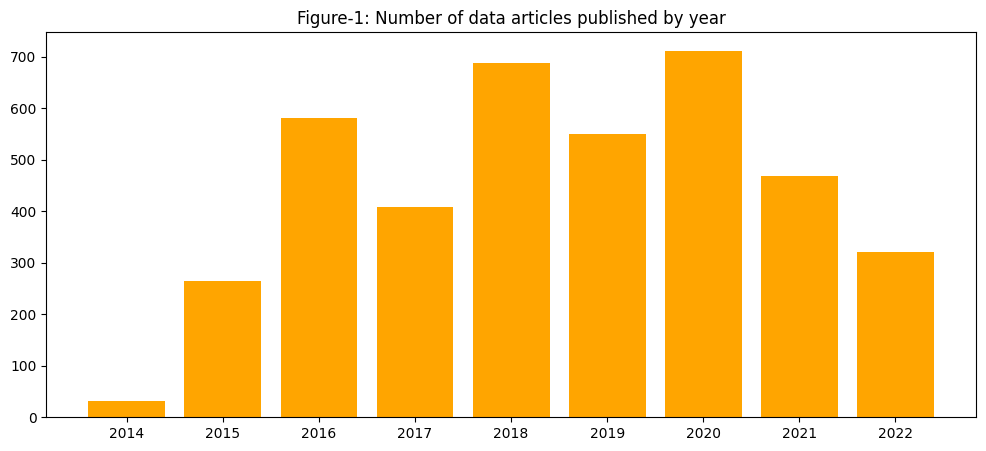

In [3]:
years = {}
for i in range(0, 4025):
    doi = input_data.iloc[i,0]
    year = doi.split(".")[3]
    if year not in years.keys():
        years[year] = 1
    else:
        years[year] += 1

plot.figure(figsize=(12,5))
x = [k for k in years.keys()]
time = sorted(x, key = int)

y = [years[i] for i in time]
print(x)
plot.bar(time,y,color = "orange")
plot.title("Figure-1: Number of data articles published by year")
plot.show()

3. Results:

The Figure-2 above shows the disciplinary distribution of the selected articles. The discipline of the selected articles is tagged by editors from Elsevier, with each article being classified into one of the following eight disciplines: biological sciences, geosciences, physics & chemistry, medical sciences, social sciences & humanities, computer & mathematical sciences, and engineering. Biological sciences, medical sciences, and engineering have the most data articles, while computer & mathematical sciences, social sciences & humanities, and physics & chemistry have the least. It is not surprising to see scholars from biological sciences and medical sciences publishing more articles than other disciplines, as research in these two disciplines is highly data-driven and experiment-driven, and scholars have a long tradition of opening and sharing their data. However, it is quite interesting to see that scholars from computer & mathematical sciences publish the least number of data articles, especially given the fact that research in this discipline is thriving and also heavily relies on data and experimentation. One possible reason for this finding may be that scholars from computer & mathematical sciences are still used to sharing data in their own way, such as using GitHub or the website of their labs.

Text(0.5, 1.0, 'Figure-2: Suject distribution of the selected articles')

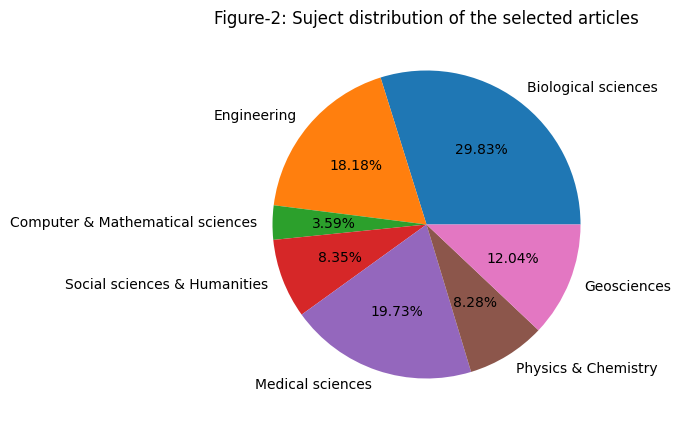

In [4]:
subject_list = {}
for i in range(0, 4025):
    if input_data.iloc[i,7] in subject_list.keys():
        subject_list[input_data.iloc[i,7]] = subject_list[input_data.iloc[i,7]] + 1
    else:
        subject_list[input_data.iloc[i,7]] = 1

frequentwords = list(subject_list.keys())[:7]
frequentvals = list(subject_list.values())[:7]
plot.figure(figsize=(12,5))
plot.pie(frequentvals, labels = frequentwords, autopct='%.2f%%')
plot.title("Figure-2: Suject distribution of the selected articles")

Of the selected articles, the average number of authors for data articles is 5.6, and the number for research articles is 6.3. Figure-3 is a histogram of the number of authors for the 4025 data articles. According to previous researches on the number of authors in papers published in papers, the average number of authors in the papers they studied is around 4-5, while the figure shows that over 60% of the selected research articles is a collaborative work of over 5 authors. It indicates that a larger research team prefer to publish a data article together with their research article.

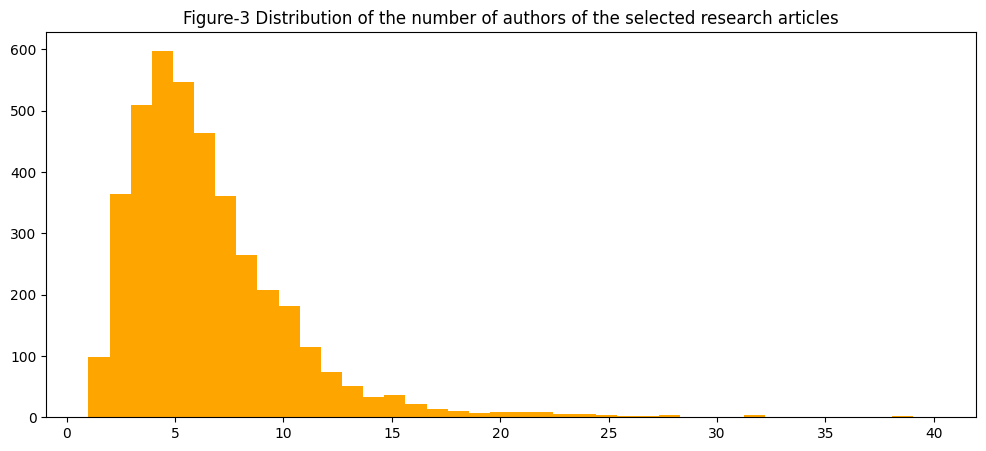

In [6]:
thedata = []
for i in range(0, 4025):
  thedata.append(input_data.iloc[i,5])
plot.figure(figsize = (12,5))
plot.hist(thedata, histtype = "bar", bins = 40, color = "orange", range = (1,40))
plot.title("Figure-3 Distribution of the number of authors of the selected research articles")
plot.show()

2459 pairs of data and research articles have identical author information, while 1566 pairs have differing author information (as shown in Figure-4). Among the pairs with differing author information, 26 pairs have the same authors listed in a different sequence, while the others have at least one different author listed.

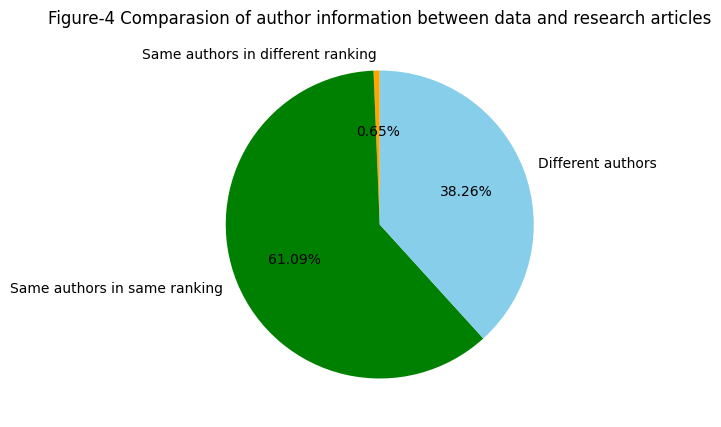

26 2459 1540


In [12]:
count_jaccard_the_same = 0 
different = 0

count_ldistance = 0
for i in range(0, 4025):
  if input_data.iloc[i,8] == 1:
    count_ldistance += 1

remain = 4025 - count_ldistance

for i in range(0, 4025):
    if input_data.iloc[i,8] != 1 and input_data.iloc[i,9] == 1:
        count_jaccard_the_same += 1
    elif input_data.iloc[i,8] != 1 and input_data.iloc[i,9] != 1:
        different += 1

plot.figure(figsize = (12,5))
thelabels = ['Same authors in different ranking','Same authors in same ranking', 'Different authors']
plot.pie([count_jaccard_the_same, count_ldistance, different], labels = thelabels, autopct='%.2f%%', startangle = 90, colors = ["orange","green","skyblue"])
plot.title("Figure-4 Comparasion of author information between data and research articles")
plot.show()

print(count_jaccard_the_same, count_ldistance, different)

The majority of the selected pairs of data and research articles (3047 pairs) have the same number of authors, and more specifically, 87 pairs have the same single author (as shown in Figure-5). Among the 1566 pairs that have at least one different author, I noticed that the research article has more authors (in 739 pairs) or the same number of authors (in 588 pairs) than the corresponding data articles in most cases (as shown in Figure-4). I further compare the average number of authors by disciplines (as shown in Figure-6). Research articles is higher than data articles in average number of authors in all the 8 disciplines, which indicates that it is common that not all research participants will contribute to data publishing work in group research, yet in most cases the majority of team members are willing to participate in data sharing work.

239 739 588 1566


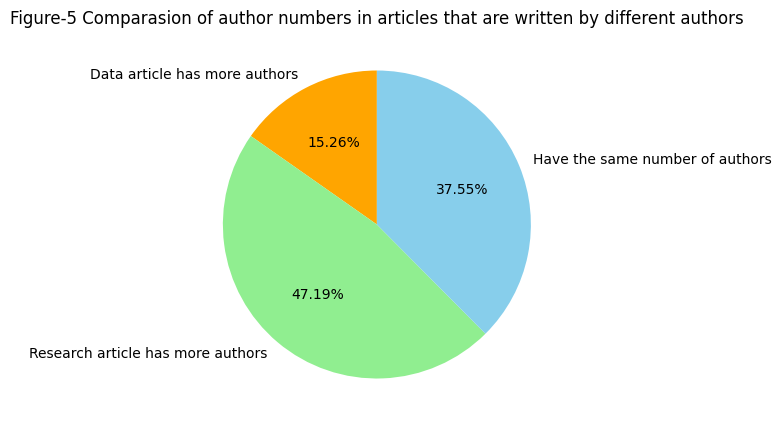

In [13]:
count_a = 0
count_b = 0
count_c = 0
tcount = 0

for i in range(0,4025):
    m = input_data.iloc[i,4]
    n = input_data.iloc[i,5]
    if input_data.iloc[i,8] != 1:
        tcount += 1
        if m > n:
            count_a += 1
        elif m < n:
            count_b += 1
        elif m == n:
            count_c += 1
print(count_a,count_b, count_c, tcount)

m = [count_a,count_b, count_c]

plot.figure(figsize = (12,5))
thelabels = ['Data article has more authors', 'Research article has more authors', 'Have the same number of authors']
plot.pie(m, labels = thelabels, autopct='%.2f%%', startangle = 90, colors = ["orange","lightgreen","skyblue"])
plot.title("Figure-5 Comparasion of author numbers in articles that are written by different authors")
plot.show()

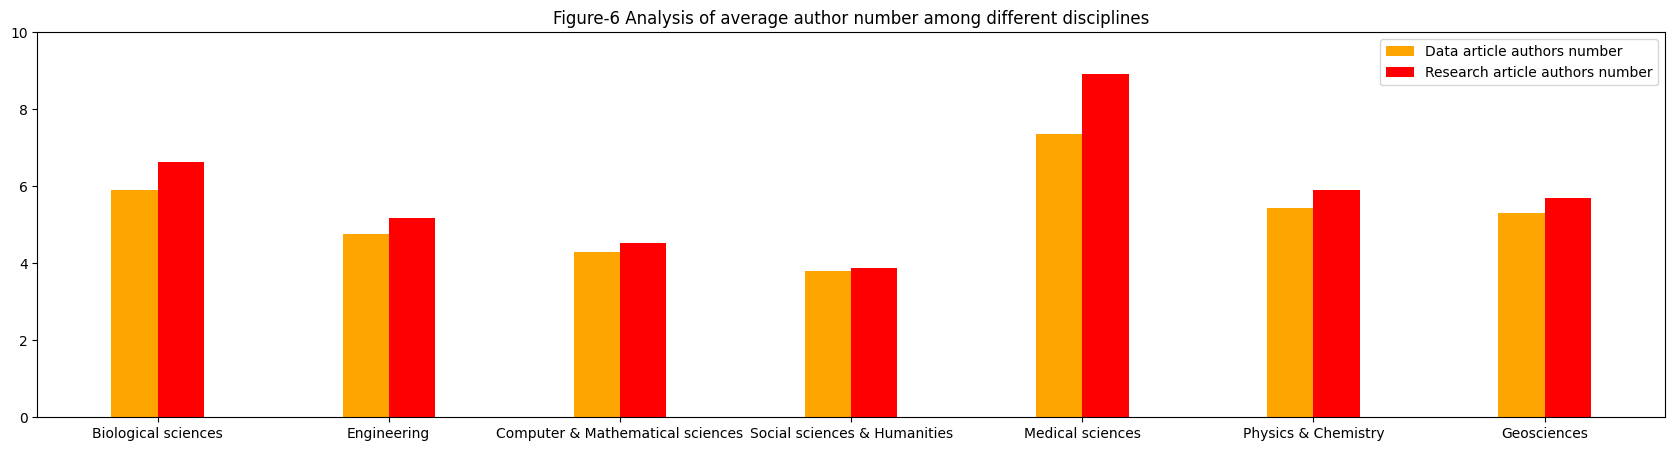

In [16]:
import numpy as np

subject_list = {}
dataauthor_list = {}
average_dataauthor = {}
researchauthor_list = {}
average_researchauthor = {}

for i in range(0, 4025):
    if input_data.iloc[i,7] in subject_list.keys():
        subject_list[input_data.iloc[i,7]] = subject_list[input_data.iloc[i,7]] + 1
        dataauthor_list[input_data.iloc[i,7]] = dataauthor_list[input_data.iloc[i,7]] + input_data.iloc[i,4] 
        researchauthor_list[input_data.iloc[i,7]] =  researchauthor_list[input_data.iloc[i,7]] + input_data.iloc[i,5] 
    else: 
        subject_list[input_data.iloc[i,7]] = 1
        dataauthor_list[input_data.iloc[i,7]] = input_data.iloc[i,4]
        researchauthor_list[input_data.iloc[i,7]] = input_data.iloc[i,5]

for i in subject_list.keys():
    average_dataauthor[i] = dataauthor_list[i]/subject_list[i]
    average_researchauthor[i] = researchauthor_list[i]/subject_list[i] 

frequent_da_words = list(average_dataauthor.keys())[:7]
frequent_da_vals = list(average_dataauthor.values())[:7]

frequent_ra_words = list(average_researchauthor.keys())[:7]
frequent_ra_vals = list(average_researchauthor.values())[:7]

size = 7
x = np.arange(size)
plot.figure(figsize=(21,5))
total_width, n = 1.2, 6
width = total_width / n
x = x - (total_width - width) / 2

plot.bar(x- 0.5*width, frequent_da_vals,  width=width, label='Data article authors number', color = "orange")
plot.bar(x+0.5*width, frequent_ra_vals,  width=width, label='Research article authors number', color ="red")

plot.xticks(x,frequent_ra_words)

plot.title("Figure-6 Analysis of average author number among different disciplines")
plot.ylim(0,10)
plot.legend()
plot.show()

I also try to measure and demonstrate the difference between the author information of data article and research article. Three metrics, RBO similarity, Jaccard index, and Levenshtein Distance. Here I demonstrate  the results of RBO similarity. RBO similarity is a similarity measure for indefinite rankings which was proposed by William Webber, Alistiar Moffat, and Justin Zobel in 2010. The measure of similarity handles non-conjointness and weights high ranks more heavily than low. The RBO similarity range from 0 to 1, in which 0 indicates that the two sequences are totally different while 1 indicates they are 100% the same. As shown in figure-7, I notice a high RBO similarity (over 0.8) in all the 8 disciplines, which confirms the previous finding that in most cases the majority of team members are willing to participate in data sharing work. Furthermore, engineering and physics & chemistry have a significantly higher RBO similarity than the other disciplines, which indicates that members of their research teams have a higher degree of participation in data publishing work. 


(0.8, 0.9)

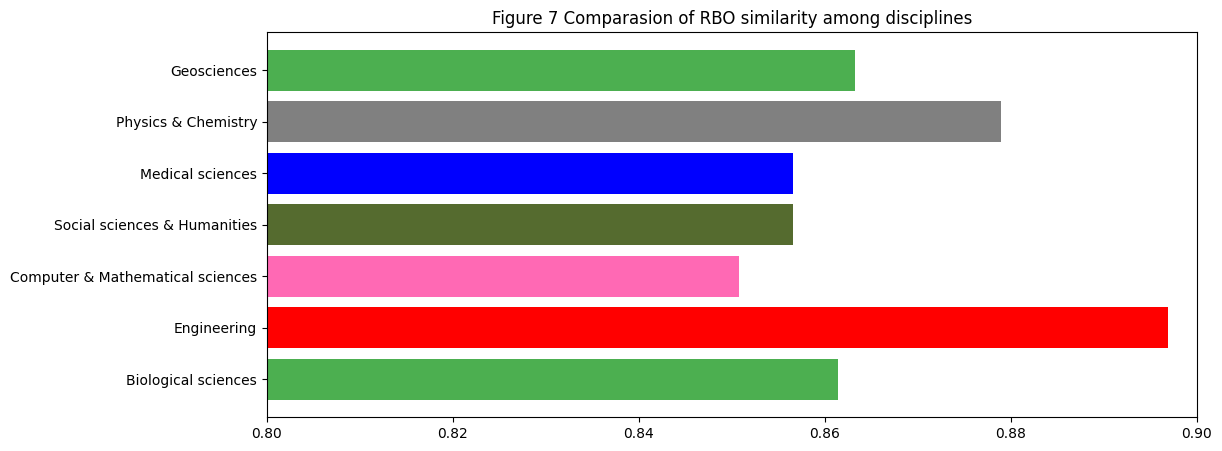

In [18]:
subject_list = {}
rbo_list = {}
averagerbo = {}
for i in range(0, 4025):
    if input_data.iloc[i,7] in subject_list.keys():
        subject_list[input_data.iloc[i,7]] = subject_list[input_data.iloc[i,7]] + 1
        rbo_list[input_data.iloc[i,7]] = rbo_list[input_data.iloc[i,7]] + input_data.iloc[i,8] 
    else:
        subject_list[input_data.iloc[i,7]] = 1
        rbo_list[input_data.iloc[i,7]] = input_data.iloc[i,8]

for i in subject_list.keys():
    averagerbo[i] = rbo_list[i]/subject_list[i]

frequentwords = list(averagerbo.keys())[:7]
frequentvals = list(averagerbo.values())[:7]
plot.figure(figsize=(12,5))
plot.barh(frequentwords, frequentvals, color = ["#4CAF50","red","hotpink","#556B2F", "blue", "grey"])
plot.title("Figure 7 Comparasion of RBO similarity among disciplines")
plot.xlim(0.8,0.9)

I finally focus on the pairs of research articles and their corresponding data articles that are different in author information to compare the rankings of authors. Among the 627 data articles analyzed, more authors receive a lower ranking in the corresponding research article, while in 314 data articles, more authors receive a higher ranking in the research article. Specifically, for each person listed as an author of both a data article and its corresponding research article, I compare their ranking in both articles. Of the total cases, 1,518 authors had a higher ranking in the research article, while 2,119 authors had a lower ranking. The distribution of ranking differences is shown in Figure 8, with negative values indicating that the author's ranking in the research article is lower than in the data article, and positive values indicating the opposite.  As seen in Figure 8, the distribution is biased towards the left side, confirming that more often than not, a data article author receives a lower ranking in the corresponding research article. In further analysis, I also observe that while the majority of data article authors receive the same or higher ranking in the corresponding research article, those who has a higher ranking in the data article is more likely to have a lower ranking in the research article. 

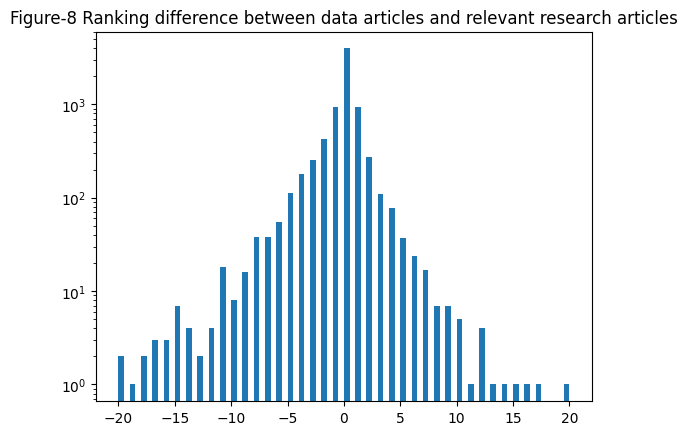

In [22]:
input_data_2 = pd.read_csv("../data/data_for_ranking_comparasion.csv") 
for i in range(0,7608):
    difference.append(-input_data_2.iloc[i,4])
plot.hist(difference,bins = 80, rwidth = 1,log = True, range = (-20,20))
plot.title("Figure-8 Ranking difference between data articles and relevant research articles")
plot.show()

4. Discussions:

According to the results, the number of data articles published by the scholars from different fields differ significantly. The scholars from biological sciences, medical sciences, and engineering publish the most data articles, while those from computer & mathematical sciences, social sciences & humanities, and physics & chemistry publish the least. The finding indicates that scholars from different disciplines show different interests in sharing their data through data article. However, this finding needs to be verified by further investigation as the total amount of academic publications in these fields is also different, and some of the disciplines may have their own preferred way to share and publish data.

The analysis also finds that the majority of data articles are created by research teams that have 5 and more members, which indicates that a large research team is more willing to write data articles to publish their data. The reason may because the more participants in research, the less credits most of the participants will gain from it, and thus they have more motivations to gain more credits from the research by publishing a data article. It is also found that the majority of team members participate in sharing data through a data article in most cases, which is a little different from my expectations. Further investigations will be needed to verify this finding and find the reason.

Finally, this study finds that the majority of data article authors receive the same or higher ranking in the corresponding research article. To be specific, the authors with a lower tanking in research article are more likely to raise their ranking in the corresponding data article, while those with a higher ranking in research article is more likely to have a lower ranking in the research article. The finding may help to explain why a larger research team shows more willingness to publish a data article.

This study provides quantitative evidences on researchers’ participation in data publishing work. The findings will facilitate the efforts on data opening, and arouse more attention to the data publishing work. More importantly, the study will also help researchers and policy makers to design metrics for measuring and rewarding the contribution that data sharing makes, which will benefit the academia forever.

When I designed the project, I initially expected to use the data to find out whether the scholars contribute to data publishing work receive well recognition in scholarship. As I went through the analytical process, I found the current data were inadequate to answer the research question, as it was unproven that the ranking of authors in a data article reflects the contributions of each author in publishing the data. Therefore, I had to settle for second best to set my questions around comparing the author information of data articles and research articles in this study. The visualization of analysis results has also been changing during working on this project. I initially made more than 15 visualizations and charts, yet I kept trying to combine as much information into every single visualization to make the whole notebook looks better.

5. Reference:

Pasquetto, I., Randles, B., & Borgman, C. (2017). On the Reuse of Scientific Data. Data Science Journal, 16(0), 8. https://doi.org/10.5334/dsj-2017-008

Plummer, S., Sparks, J., Broedel-Zaugg, K., Brazeau, D. A., Krebs, K., & Brazeau, G. A. (2023). Trends in the Number of Authors and Institutions in Papers Published in AJPE 2015-2019. American Journal of Pharmaceutical Education, 87(2). https://doi.org/10.5688/ajpe8972

Popkin, G. (2019). Data sharing and how it can benefit your scientific career. Nature, 569(7756), 445–447. https://doi.org/10.1038/d41586-019-01506-x

Shamsi, A., Heidari, H., & Chanbari, Z. (2020). Scientific collaboration of authors in Payesh Journal from 2012-2019. Caspian Journal of Scientometrics, 7(1), 42–51. https://doi.org/10.22088/cjs.7.1.42

Staunton, C., Barragán, C. A., Canali, S., Ho, C., Leonelli, S., Mayernik, M., Prainsack, B., & Wonkham, A. (2021). Open science, data sharing and solidarity: who benefits? History and Philosophy of the Life Sciences, 43(4), 115. https://doi.org/10.1007/s40656-021-00468-6

Wallis, J. C., Rolando, E., & Borgman, C. L. (2013). If We Share Data, Will Anyone Use Them? Data Sharing and Reuse in the Long Tail of Science and Technology. PLoS ONE, 8(7), e67332. https://doi.org/10.1371/journal.pone.0067332
Walport, M., & Brest, P. (2011). Sharing research data to improve public health. The Lancet, 377(9765), 537–539. https://doi.org/10.1016/S0140-6736(10)62234-9
